In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

# 사전 학습된 모델 불러오기
#input_tensor = Input(shape=(150,150,3))


# include_top : 신경망 FC 층 존재 유무 ( False : 제거 / True : 유지 )
# weights : 가중치 모델 지정 ( None : 초기화된 가중치, 'imagenet' : 사전 학습된 가중치 )
# input_tensor : 입력 텐서 크기 ( Input(shape = (w, h, ch))

#model = VGG16(weights='imagenet', include_top=False, input_tensor = input_tensor)  

model = VGG16()



553476096/553467096 [==============================] - 3s 0us/step


In [68]:
#fileName=input image 
import numpy as np
fileName = '/content/drive/MyDrive/data/딥러닝/자동차.jpg'
image = load_img(fileName, target_size=(224, 224))

image = img_to_array(image)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])


In [78]:
image = preprocess_input(image) # vgb 16제공 전처리(스케일링, 흑백)
yhat = model.predict(image)  #yhat  # y_hat 카테고리가 1000개임
print(np.shape(yhat))
print(len(yhat[0]))

(1, 1000)
1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


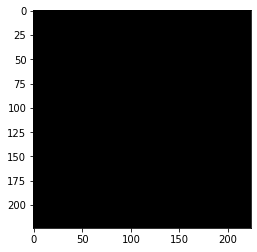

In [80]:
import matplotlib.pyplot as plt

plt.imshow(image.reshape(224,224,3))

In [79]:
label = decode_predictions(yhat) # 클래스 네임로 변경 한거
label

[[('n04285008', 'sports_car', 0.9443222),
  ('n03459775', 'grille', 0.04775505),
  ('n03100240', 'convertible', 0.0033284568),
  ('n02814533', 'beach_wagon', 0.003278723),
  ('n04037443', 'racer', 0.00091132504)]]

In [66]:
label = label[0][0]
print('%s (%.2f%%)'%(label[1], label[2]*100))

sports_car (47.10%)
